# Chapter 10 - Hashing and Symbol Tables

Dictionaries are built with hash tables that rely on a concept called hashing. 

## Hashing
Hashing is a concept of converting a data of arbitrary size into a data of fixed size, commonly used in operations like converting strings or other datatypes into integers. 

In order to hash the expression `"Hello World"`, we want to get a numeric value that we could, say _represents_ the string. 

We can just sum the ordinal numbers of each character in the string:

<table>
    <tr>
        <td>h</td>
        <td>e</td>
        <td>l</td>
        <td>l</td>
        <td>o</td>
        <td></td>
        <td>w</td>
        <td>o</td>
        <td>r</td>
        <td>l</td>
        <td>d</td>
    </tr>
    <tr>
        <td>104</td>
        <td>101</td>
        <td>108</td>
        <td>108</td>
        <td>111</td>
        <td>32</td>
        <td>119</td>
        <td>111</td>
        <td>114</td>
        <td>104</td>
        <td>100</td>
    </tr>
</table>
<center>
    = 1116
</center>

In [1]:
sum(map(ord, 'hello world'))

1116

But we can change the order of string, and still get the same result.

In [2]:
sum(map(ord, 'wello horld'))

1116

<table>
    <tr>
        <td>w</td>
        <td>e</td>
        <td>l</td>
        <td>l</td>
        <td>o</td>
        <td></td>
        <td>h</td>
        <td>o</td>
        <td>r</td>
        <td>l</td>
        <td>d</td>
    </tr>
    <tr>
        <td>119</td>
        <td>101</td>
        <td>108</td>
        <td>108</td>
        <td>111</td>
        <td>32</td>
        <td>104</td>
        <td>111</td>
        <td>114</td>
        <td>104</td>
        <td>100</td>
    </tr>
</table>
<center>
    = 1116
</center>

But we can also change a character from $x$ less, alongside $x$ more in the string, and still get the same result.

In [3]:
sum(map(ord, 'gello xorld'))

1116

<table>
    <tr>
        <td>g</td>
        <td>e</td>
        <td>l</td>
        <td>l</td>
        <td>o</td>
        <td></td>
        <td>x</td>
        <td>o</td>
        <td>r</td>
        <td>l</td>
        <td>d</td>
    </tr>
    <tr>
        <td>103</td>
        <td>101</td>
        <td>108</td>
        <td>108</td>
        <td>111</td>
        <td>32</td>
        <td>120</td>
        <td>111</td>
        <td>114</td>
        <td>104</td>
        <td>100</td>
    </tr><tr>
        <td>-1</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
        <td>+1</td>
        <td></td>
        <td></td>
        <td></td>
        <td></td>
    </tr>
</table>
<center>
    = 1116
</center>

## Perfect Hashing Functions
A perfect hashing function is one in which each String (in this context) guarranteed to be unique. It also need to be fast for realistic use. So, trying to create a function that will give each string a unique hash value is not possible. Instead, we live with the fact that sometimes, we get collisions, and come up with a strategy to resolve them.  

We can come up with ways to avoid collision. We could, for example, add a multiplier, so that the hash value for each character becomes multiplier value, multiplied by the oridinal value of the character. The multiplier then increases as we progress through the string.

In [4]:
def myHash(s):
    mult = 1
    hv = 0
    for ch in s:
        hv+=mult*ord(ch)
        mult+=1
    return hv

In [5]:
print(myHash('The quick brown fox jumps over the lazy dog.'))

91538


In [6]:
strgs = [
    "hello world",
    "world hello",
    "wello horld",
    "gello xorld",
]

for s in strgs:
    print(myHash(s))

6736
6616
6646
6742


<table>
    <tr>
        <td>h</td>
        <td>e</td>
        <td>l</td>
        <td>l</td>
        <td>o</td>
        <td></td>
        <td>w</td>
        <td>o</td>
        <td>r</td>
        <td>l</td>
        <td>d</td>
        <td></td>
    </tr>
    <tr>
        <td>103</td>
        <td>101</td>
        <td>108</td>
        <td>108</td>
        <td>111</td>
        <td>32</td>
        <td>120</td>
        <td>111</td>
        <td>114</td>
        <td>104</td>
        <td>100</td>
        <td>= 1116</td>
    </tr><tr>
        <td>1</td>
        <td>2</td>
        <td>3</td>
        <td>4</td>
        <td>5</td>
        <td>6</td>
        <td>7</td>
        <td>8</td>
        <td>9</td>
        <td>10</td>
        <td>11</td>
        <td></td>
    <tr>
        <td>103</td>
        <td>202</td>
        <td>324</td>
        <td>432</td>
        <td>555</td>
        <td>192</td>
        <td>833</td>
        <td>888</td>
        <td>1026</td>
        <td>1080</td>
        <td>1100</td>
        <td>= 6736</td>
    </tr>
</table>

This doesn't mean that we have a perfect hash.

In [7]:
strgs = [
    'ad',
    'ga'
]

for s in strgs:
    print(myHash(s))

297
297


## Hash Table

A hash table is a form of list where elements are accessed by a keyword rather than an index number.

In [8]:
class HashItem:
    def __init__(self, key, value):
        self.key = key
        self.value = value

In [11]:
class HashTable:
    def __init__(self):
        self.size = 256
        self.slots = [None for i in range(self.size)]
        self.count = 0
        
    def _hash(self, key):
        mult = 1
        hv = 0
        for ch in key:
            hv += mult * ord(ch)
            mult += 1
        return hv % self.size
    
    def put(self, key, value):
        item = HashItem(key, value)
        h = self._hash(key)
        while self.slots[h] is not None:
            if self.slots[h].key is key:
                break
            h = (h+1) % self.size
            if self.slots[h] is not None:
                self.count+=1
            self.slots[h] = item
    
    def get(self, key):
        h = self._hash(key)
        while self.slots[h] is not None:
            if self.slots[h] is key:
                return self.slots[h].value
            h=(h+1) % self.size
        return None

Note that size and count are not the same thing. Size means the total number of slots and count means the slots that are filled. 

### Testing the Hash Table

In [10]:
ht = HashTable()
ht.put("good", "eggs")
ht.put("better", "ham")
ht.put("best", "spam")
ht.put("ad", "do not")
ht.put("ga", "collide")
for key in ("good", "better", "best", "worst", "ad", "ga"):
    v = ht.get(key)
    print(v)

None
None
None
None
None
None


## Using [ ] with the hash table

In [1]:
class HashTable:
    def __init__(self):
        self.size = 256
        self.slots = [None for i in range(self.size)]
        self.count = 0
        
    def _hash(self, key):
        mult = 1
        hv = 0
        for ch in key:
            hv += mult * ord(ch)
            mult += 1
        return hv % self.size
    
    def put(self, key, value):
        item = HashItem(key, value)
        h = self._hash(key)
        while self.slots[h] is not None:
            if self.slots[h].key is key:
                break
            h = (h+1) % self.size
        if self.slots[h] is not None:
            self.count+=1
        self.slots[h] = item
    
    def get(self, key):
        h = self._hash(key)
        while self.slots[h] is not None:
            if self.slots[h] is key:
                return self.slots[h].value
            h=(h+1) % self.size
        return None
    
    # NEW:
    def __setitem__(self, key, value):
        self.put(key, value)
        
    def __getitem__(self, key):
        return self.get(key)

## Non-string Keys
Other Python types can be used as a key. In case of creating own class to use as a key, you'll sometimes need to override the `__hash__()` to get reliable hash values. 

## Growing a hash table
The hash table size was 256. To grow the table when it is getting full, we compare the size and the count. If `count == size`, we have filled up the table. 

The hash table's load factor gives an indication about how large a portion of the available slots are being used:

$\mbox{load factor} = \frac{n}{k}$

As load factor approaches 1, the table needs to grow. Doing before it reaches 1 may help performance. A value of 0.75 may be a good point to grow the table. 

## Open adressing
The collision resolution mechanism used, Linear Probing, is an example of open adressing strategy. Linear Probing is really simple since we use a fixed interval between our probes. 

There are other open adressing strategies, but they all share the idea that there is an array of slots. When we want to insert a key, we check whether the slot already has an item or not. If it does, we look at the next available slot. 

As the load factor increases, it will take longer to find the insertion point for new element.

Because of these limitations, a different strategy, such as chaining may be used. 

## Chaining
Chaining is a strategy for resolving conflicts and avoiding the limit to the number of elements in a hash table. In chaining, the number of slots in the hash table are initialised with empty lists.

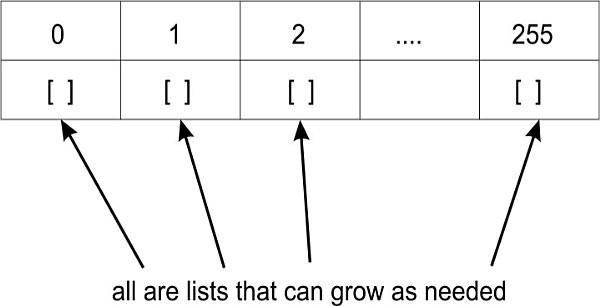

When an element is inserted, it will be appended to the list that corresponds to the element's hash value, i.e. two elements that both have a hash value of 1167, these two elements will both be added to the list that exists in slot 1167 of the hash table.

Chaining avoides conflicts by allowing multiple elements to have same hash value, avoids the problem of insertion as load factor increases as we don't have to look for a slot, and can hold more values than available slots due to list that can grow. 

Searching can be slow in a heavily populated slot due to linear search, slowing down retrieval. This is not good, as has tables are meant to be efficient. 

Instead of lists, we can initialize an empty BST in each slot. 

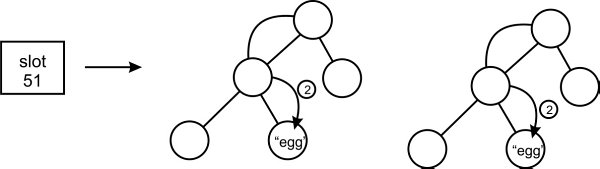

But depending upon the order, we can still end up with a search tree that is as inefficient as a list. To. avoid this, we need to ensure that the BST is self balancing. 

## Symbol Tables
These are used by compilers and interpreters to track declared symbols and related information. These are often built using hash tables due to efficiency.

In [2]:
name="Joe"
age=27

Here, we have 2 symbols, `name` & `age` in namespace `__main__`, or module if placed it there.

Each has a value (`name` has `"Joe"` and `age` has `27`). A symbol table allows the compiler/interpreter to look these values up. The symbols `name` and `age` become keys in the hash table, and other information such as value becomes part of the symbol table entry.

Just like variables, function and classes are symbols as well. 

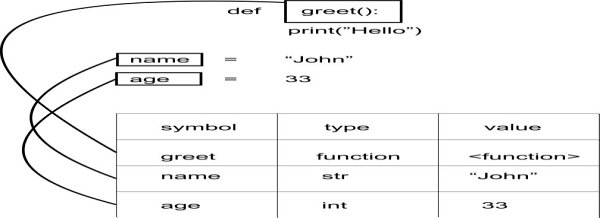

In Python, each module loaded has its own symbol table, given the name of the module, thereby modules acting as namespaces. We can have multiple symbols called `age`, as long as they exist in different symbol table. To access either one, we access it through the appropriate symbol table:

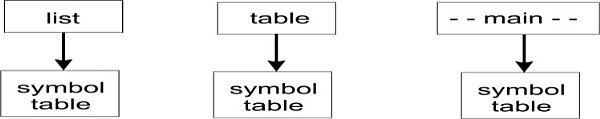

## Summary
We looked at: 
- Hash Tables
- Hashing Functions
- Using Hashed Keys
- Imperfections of Hash Functions
- Symbol Tables